# For Generating Images

In [3]:
import os
import cv2

path = 'images'
video_path = 'video'
moods = os.listdir(path)


def video_conv(video_files, save_folder):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    j = 1 #counter of saved images
    
    for file in video_files:
        print("Extracting",file)
        video = cv2.VideoCapture(file)
        if not video.isOpened():
            print(f"Error: Could not open video file {file}")
            continue
        i = 0
        while True:
            i += 1
            ret, frame = video.read()
            if i!=2: continue
            i = 0
            if not ret:
                break
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            faces = face_cascade.detectMultiScale(gray, 1.5, 5)

            for (x, y, w, h) in faces:
                roi_gray = gray[y:y + h, x:x + w]
                roi = cv2.resize(roi_gray, (224,224), interpolation=cv2.INTER_LINEAR)
                cv2.imwrite(os.path.join(save_folder, f'image_{j}.jpg'), roi)
                j += 1
        video.release()

for mood in moods:
  print(mood)
  files = os.listdir(f'{video_path}/{mood}')
  video_files = [os.path.join(video_path,mood,file) for file in files if file.endswith(('.mp4', '.avi', '.MOV'))]
  video_conv(video_files,f'{path}/{mood}')

angry
Extracting video\angry\angry.mp4
confused
Extracting video\confused\confused.mp4
happy
Extracting video\happy\happy.mp4
sad
Extracting video\sad\sad.mp4


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

idg = ImageDataGenerator(rescale=1./255,
                         validation_split= 0.25,
                         )

train_gen = idg.flow_from_directory('images', batch_size=32, 
                                    target_size=(224,224), 
                                    class_mode='categorical', 
                                    subset='training')
test_gen = idg.flow_from_directory('images', batch_size=32, 
                                   target_size=(224,224), 
                                   class_mode='categorical', 
                                   subset='validation')

Found 386 images belonging to 4 classes.
Found 125 images belonging to 4 classes.


In [2]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Dense, Dropout, Flatten, Conv2D, Activation
from keras.optimizers import Adam

In [3]:
model_1 = Sequential()

# Convolutional layers
model_1.add(Conv2D(32, (2, 2), strides=(1, 1), input_shape=(224,224,3), activation='relu'))
model_1.add(Conv2D(32, (2, 2), strides=(1, 1), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (2, 2), strides=(1, 1), activation='relu'))
model_1.add(Conv2D(64, (2, 2), strides=(1, 1), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(128, (2, 2), strides=(1, 1), activation='relu'))
model_1.add(Conv2D(128, (2, 2), strides=(1, 1), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

# flatten layers
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.25))

# output layer
model_1.add(Dense(4, activation = 'softmax'))

model_1.summary()

C:\Users\MAWEL\anaconda3\envs\CPE313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 223, 223, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 110, 110, 64)   │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 53, 53, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,204,036 (42.74 MB)

 Trainable params: 11,204,036 (42.74 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model_1.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])
hist_1 = model_1.fit(
    train_gen,
    epochs=25,
    validation_data=(test_gen))

Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.4682 - loss: 1.2296 - val_accuracy: 0.6160 - val_loss: 1.1560
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6270 - loss: 0.9702 - val_accuracy: 0.6640 - val_loss: 0.9393
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7743 - loss: 0.6341 - val_accuracy: 0.6640 - val_loss: 0.9202
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7916 - loss: 0.6657 - val_accuracy: 0.7360 - val_loss: 0.5588
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8493 - loss: 0.3492 - val_accuracy: 0.9200 - val_loss: 0.3528
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9398 - loss: 0.2012 - val_accuracy: 0.9200 - val_loss: 0.3247
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9119 - loss: 0.3017 - val_accuracy: 0.9760 - val_loss: 0.2163
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9476 - loss: 0.2154 - val_accuracy: 0.9760 - val_loss:

In [11]:
import cv2
import numpy as np

mood = ['Angry', 'Confused', 'Happy', 'Sad']
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
camera = cv2.VideoCapture(0)

while True:
    ret, frame = camera.read()

    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    roi = cascade.detectMultiScale(gray, 1.5, 5)

    for (x,y,w,h) in roi:
        face = frame[y:y+h, x:x+w]
        face = cv2.resize(face, (224,224))
        face = np.expand_dims(face, axis=0)

        pred = model_1.predict(face)
        label = np.argmax(pred)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, mood[label], (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

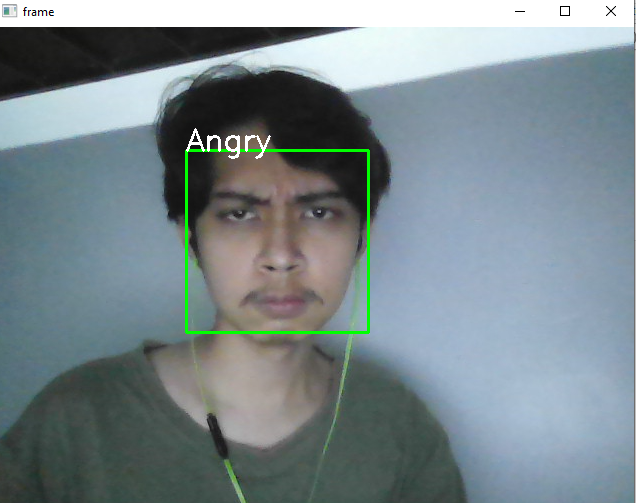

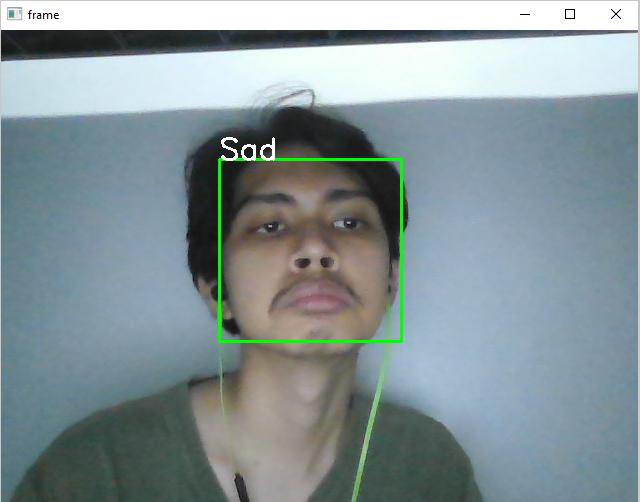

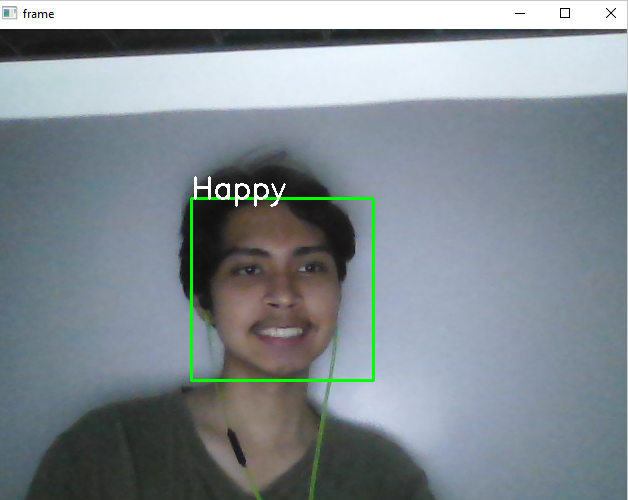

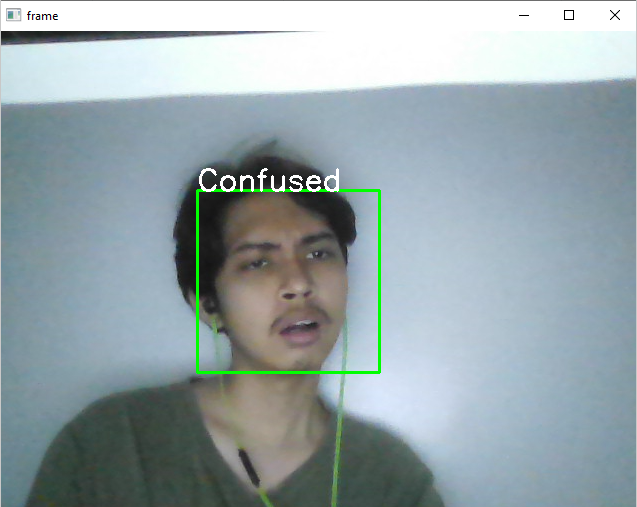